# **Estudio Framingham de riesgo cardiovascular**

### **ABSTRACT**

Una pequeña ciudad en Massachusetts, Framingham, donde en 1948 un grupo de científicos decidió revelar los misterios del corazón humano. Así nació el Estudio de Framingham, una investigación que ha seguido a miles de personas a lo largo de tres generaciones, para relacionar datos y factores de riesgo con el fin de contribuir a la prevención de enfermedad cardiovascular (ECV).

En este estudio, nos sumergimos en los datos del Framingham Heart Study extraído de Kaggle, con el objetivo de descubrir patrones ocultos y relaciones significativas que puedan predecir ECV a 10 años. Comenzamos nuestro viaje con un Análisis Exploratorio de Datos (EDA), utilizando herramientas de visualización para dar luz a patrones ocultos y relaciones entre variables. Identificamos valores nulos y outliers, asegurándonos de que nuestros datos logren la mayor precisión y depuración posible para el buen funcionamiento de los modelos predictivos.

Nutridos del EDA, nos aventuramos en el mundo del machine learning. Probamos diferentes modelos, cada uno con su propio enfoque para resolver la predicción. Evaluamos su precisión y capacidad predictiva, buscando el modelo que pueda prever con mayor certeza quién está en riesgo de sufrir una enfermedad cardiovascular.

Los hallazgos de este estudio no solo nos acercan a comprender mejor los factores de riesgo, sino que también demuestran el poder de la inteligencia artificial en la medicina preventiva. Con cada predicción acertada, damos un paso más hacia un futuro donde las enfermedades del corazón puedan ser detectadas y tratadas a tiempo.

### **AUDIENCIA OBJETIVO**

El presente proyecto está destinado a los profesionales de la medicina cardiovascular, quienes podrían beneficiarse de la inteligencia artificial para predecir ECV y tomar acciones terapéuticas e higiénico - dietéticas para los pacientes con screening de riesgo. 

### **Key Features**

##### **Datos demográficos**: género, edad y nivel educativo.
##### **Indicadores de salud**: tabaquismo, presión arterial, niveles de colesterol, índice de masa corporal (BMI), y niveles de glucosa.
##### **Historia clínica**: prevalencia de ACV, hipertensión arterial, y diabetes.
##### **Variable target**: Riesgo de desarrollar ECV a 10 años
##### **Dataset shape**: el dataset original cuenta 4240 registros x 16 campos (variables). Del total de registros, 582 presentan al menos un valor nulo. Se decide eliminar los registros con valores nulos, quedando un total de **3658 registros (13.72% de pérdida de registros)**. 


In [2]:
# Importo las primeras librerias que vamos a utilizar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = 'https://github.com/matisolica/Proyecto-final-DS2/raw/refs/heads/main/framingham_heart_study.csv'
df = pd.read_csv(data, sep=',') # Importo el dataset
df.head() # Mostrar las primeras 5 filas

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

### **ANÁLISIS EXPLORATORIO DE DATOS (EDA)**

In [4]:
df.shape

(4240, 16)

In [5]:
df.isnull().sum() # Verifico si hay valores nulos

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
df.dropna(inplace=True) # Elimino las filas con valores nulos
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [7]:
df.shape # Muestro la nueva cantidad de filas y columnas

(3658, 16)

In [8]:
df.columns # Muestro el nombre de las columnas del df

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [9]:
df.rename(columns={'male' : 'sex'}, inplace=True) # Cambio el nombre de la columna male por sex

In [10]:
df.info() # Información del dataset

<class 'pandas.core.frame.DataFrame'>
Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.8 KB


### Operacionalización de las variables

A continuación, se describen las variables incluídas en el dataset, con el fin de operacionalizar cada una y comprender su significado:

##### **sex**: describe el sexo de cada unidad de análisis. Un valor igual a 0 define un individuo de sexo femenino, mientras que 1 describe a un individuo de sexo masculino.
##### **age**: describe la edad de cada unidad de análisis.
##### **education**: describe la educación del individuo unidad de análisis, en un rango de 1 a 4. Si bien no encontré la descripción de la variable en la publicación de Kaggle ni en algunos notebooks explorados que utilizaron el mismo dataset, dada la correlación entre edad y educación = -0.18 que refleja una correlación que tiende a ser inversamente proporcional. infiero una lógica inversa en la variable educación, donde 1 es un alto nivel educativo y 4 un bajo nivel educativo. 
##### **currentSmoker**: describe el hábito tabaquista de la unidad de análisis. 0 indica que no es tabaquista, mientras que 1 indica que sí lo es. 
##### **cigsPerDay**: describe la cantidad de cigarrillos por día que fuma el individuo unidad de análisis.
##### **BPMeds**: describe si la unidad de análisis toma medicamentos para control de la presión arterial. 0 indica que no toma medicamentos para controlar la presión arterial, 1 que sí los toma. 
##### **prevalentStroke**: indica si la unidad de análisis ha padecido algún evento de accidente cerebrovascular (ACV). 0 indica que no lo ha tenido, 1 indica que sí lo tuvo. 
##### **prevalentHyp**: indica si la unidad de análisis es hipertenso. 0 indica que no es hipertenso, 1 indica que sí lo es. 
##### **diabetes**: indica si la unidad de análisis es diabético. 0 indica que no es hipertenso, 1 indica que sí lo es.
##### **totChol**: indica los niveles de colesterol total dosado en análisis de laboratorio de cada unidad de análisis, en miligramos por decilitro (mg/dL). 
##### **sysBP**: indica la presión arterial sistólica de la unidad de análisis, en mmHg.
##### **diaBP**: indica la presión arterial diastólica de la unidad de análisis, en mmHg.
##### **BMI**: indica el índice de masa corporal de la unidad de análisis.
##### **heartRate**: indica la frecuencia cardiaca de la unidad de análisis, en latidos/minuto.
##### **glucose**: indica los niveles de glucosa en sangre de la unidad de análisis, en miligramos por decilitro (mg/dL)
##### **TenYearCHD**: indica la prevalencia a 10 años de desarrollar ECV. 0 indica que no ha desarrollado ECV, 1 indica que sí ha desarrollado. 

In [11]:
df.describe().T # Resumen estadístico

count        mean        std     min     25%     50%  \
sex              3658.0    0.443685   0.496886    0.00    0.00    0.00   
age              3658.0   49.551941   8.562029   32.00   42.00   49.00   
education        3658.0    1.980317   1.022656    1.00    1.00    2.00   
currentSmoker    3658.0    0.489065   0.499949    0.00    0.00    0.00   
cigsPerDay       3658.0    9.025424  11.921590    0.00    0.00    0.00   
BPMeds           3658.0    0.030344   0.171557    0.00    0.00    0.00   
prevalentStroke  3658.0    0.005741   0.075561    0.00    0.00    0.00   
prevalentHyp     3658.0    0.311646   0.463229    0.00    0.00    0.00   
diabetes         3658.0    0.027064   0.162292    0.00    0.00    0.00   
totChol          3658.0  236.847731  44.097681  113.00  206.00  234.00   
sysBP            3658.0  132.370558  22.086866   83.50  117.00  128.00   
diaBP            3658.0   82.917031  11.974258   48.00   75.00   82.00   
BMI              3658.0   25.782802   4.065601   15.54   23.08   25.38   
heartRate        3658.0   75.730727  11.981525   44.00   68.00   75.00   
glucose          3658.0   81.852925  23.904164   40.00   71.00   78.00   
TenYearCHD       3658.0    0.152269   0.359331    0.00    0.00    0.00   

                      75%    max  
sex                1.0000    1.0  
age               56.0000   70.0  
education          3.0000    4.0  
currentSmoker      1.0000    1.0  
cigsPerDay        20.0000   70.0  
BPMeds             0.0000    1.0  
prevalentStroke    0.0000    1.0  
prevalentHyp       1.0000    1.0  
diabetes           0.0000    1.0  
totChol          263.0000  600.0  
sysBP            143.8750  295.0  
diaBP             90.0000  142.5  
BMI               28.0375   56.8  
heartRate         82.0000  143.0  
glucose           87.0000  394.0  
TenYearCHD         0.0000    1.0

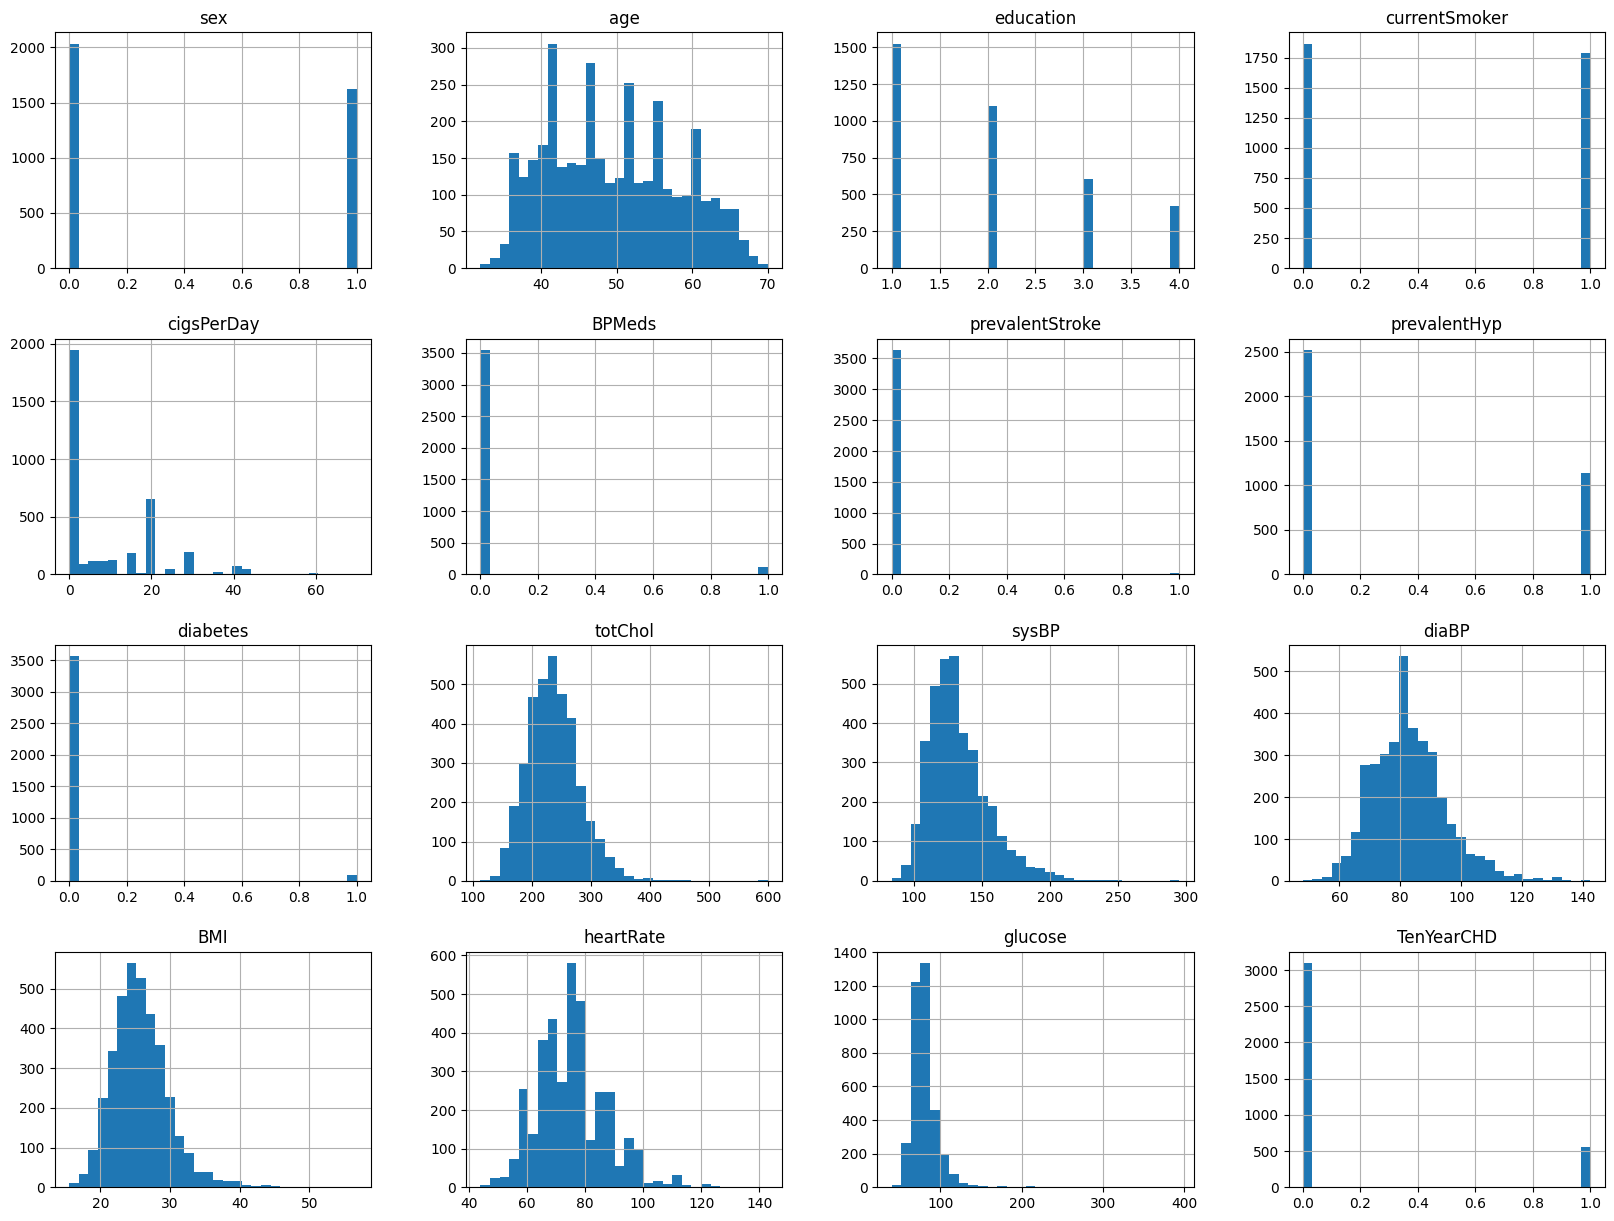

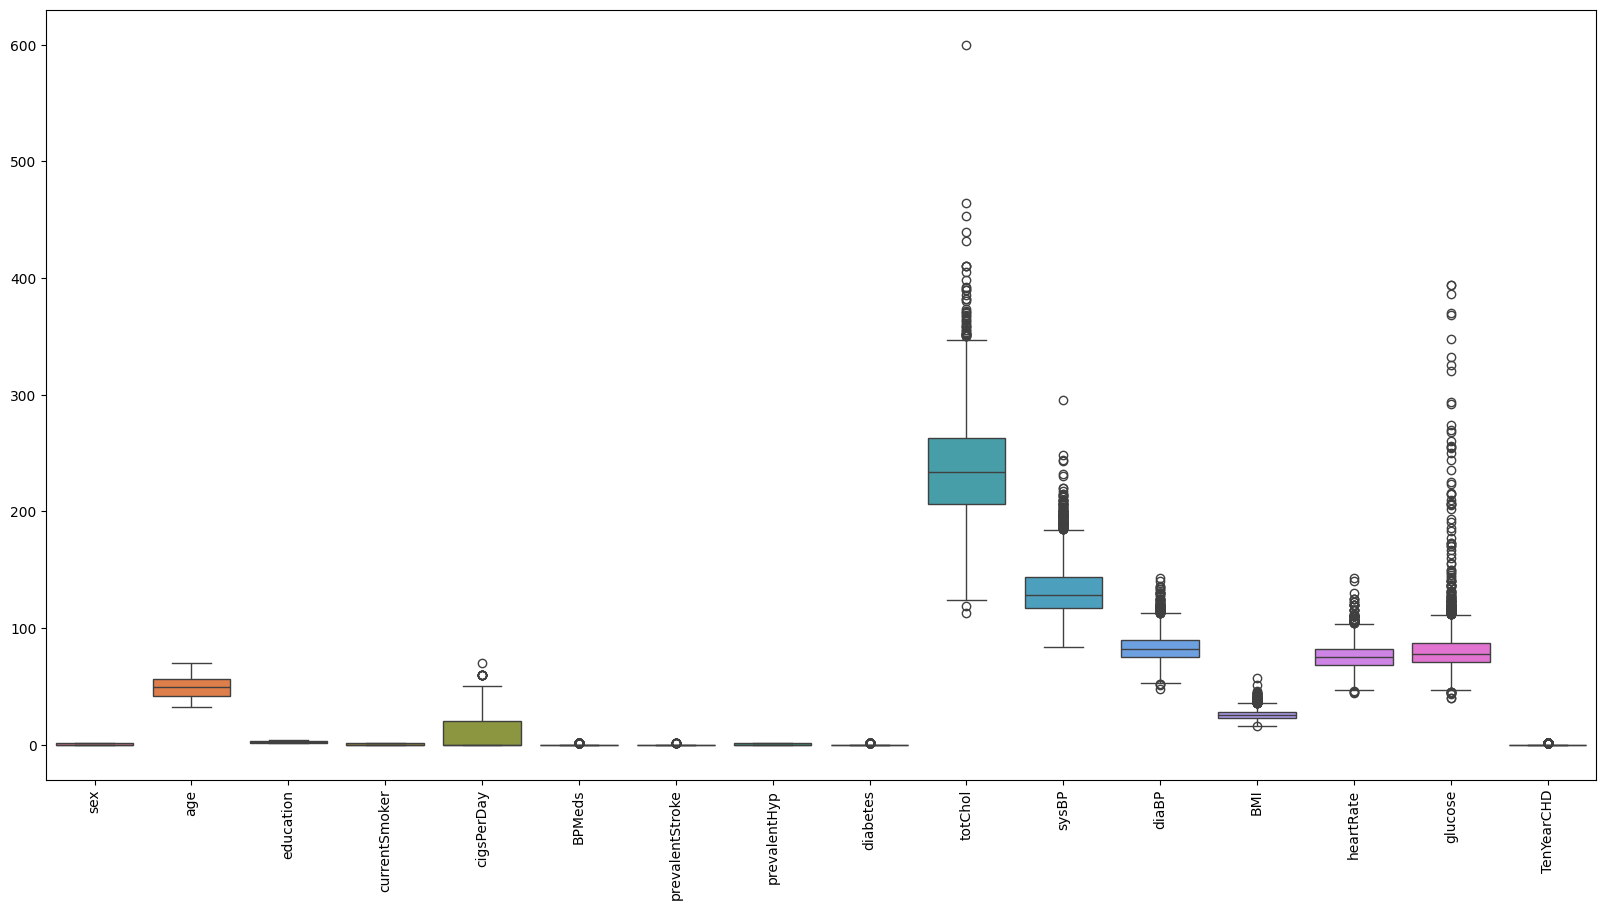

In [12]:
# Histograma de las variables numéricas
df.hist(bins=30, figsize=(20, 15))
plt.show()

# Boxplot de las variables numéricas
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

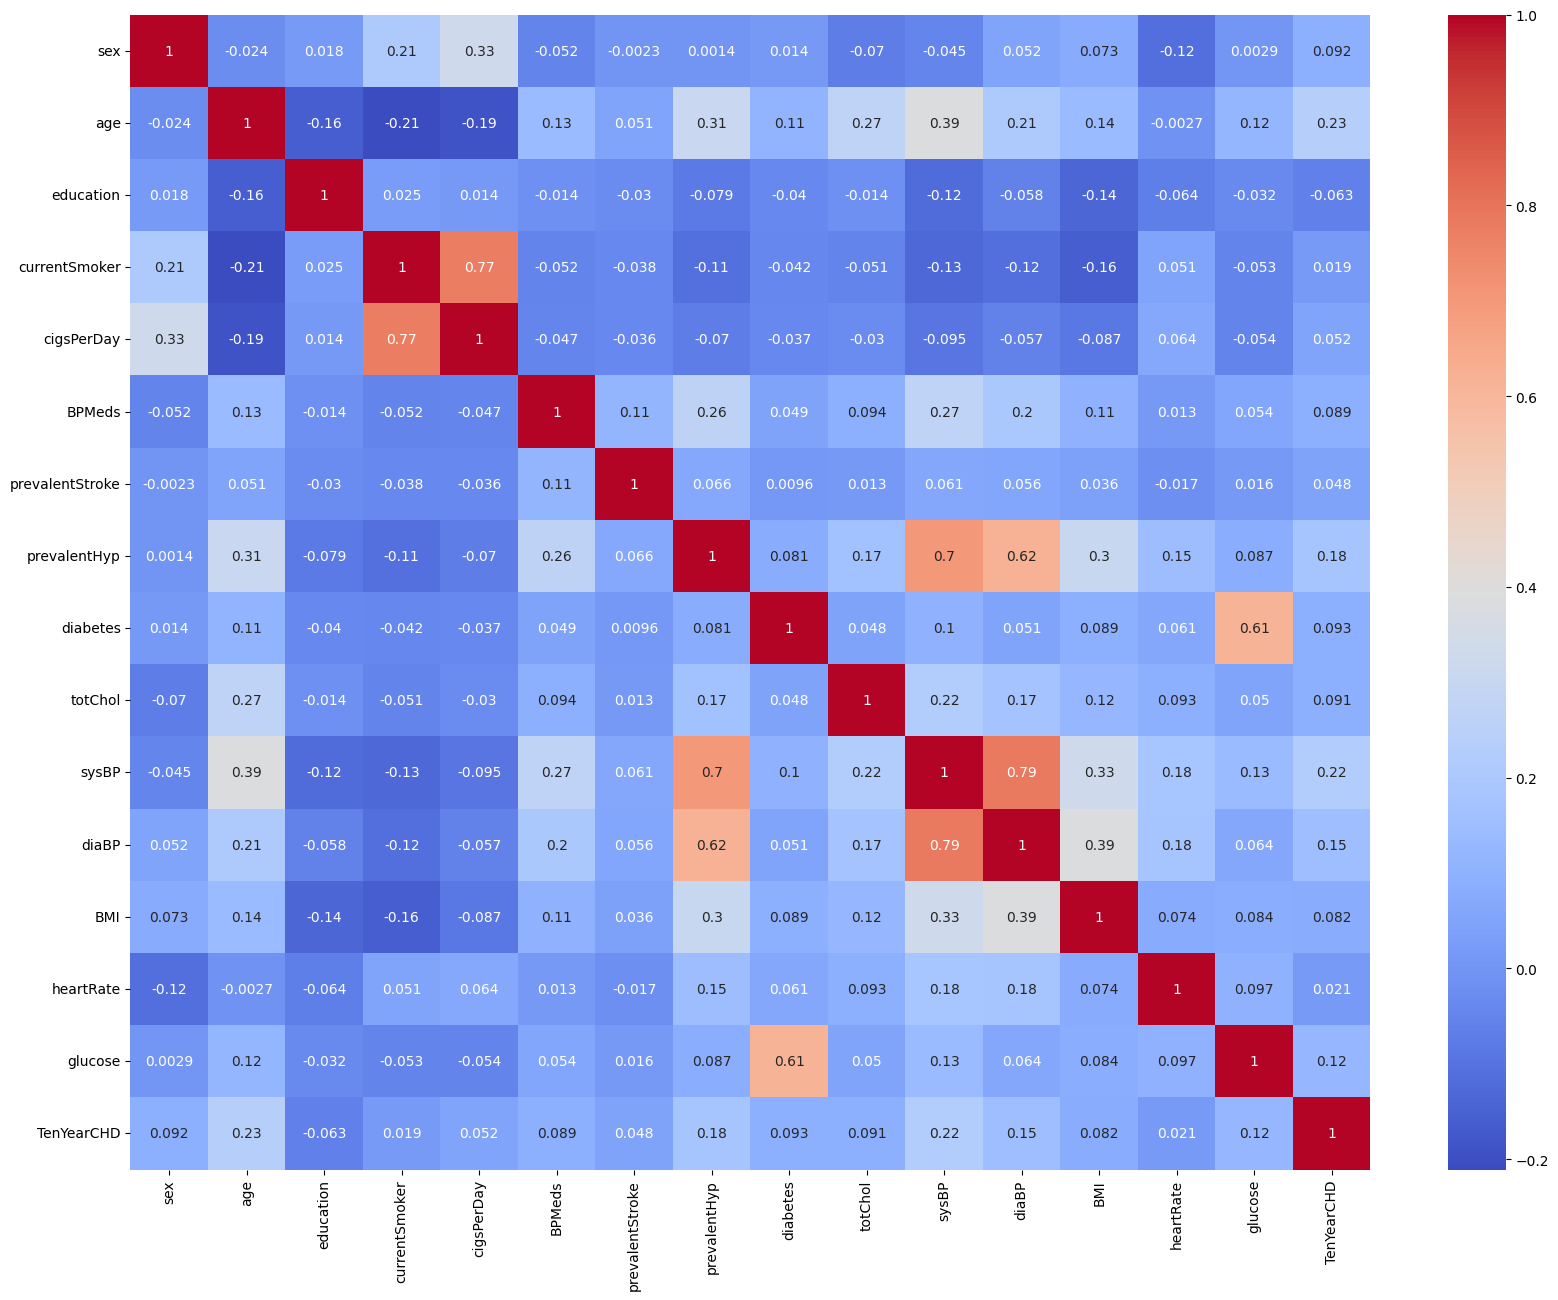

In [13]:
# Matriz de correlación
corr_matrix = df.corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Las variables edad y cigarrillos por día hay que redefinirlos en rangos para una mejor visualización

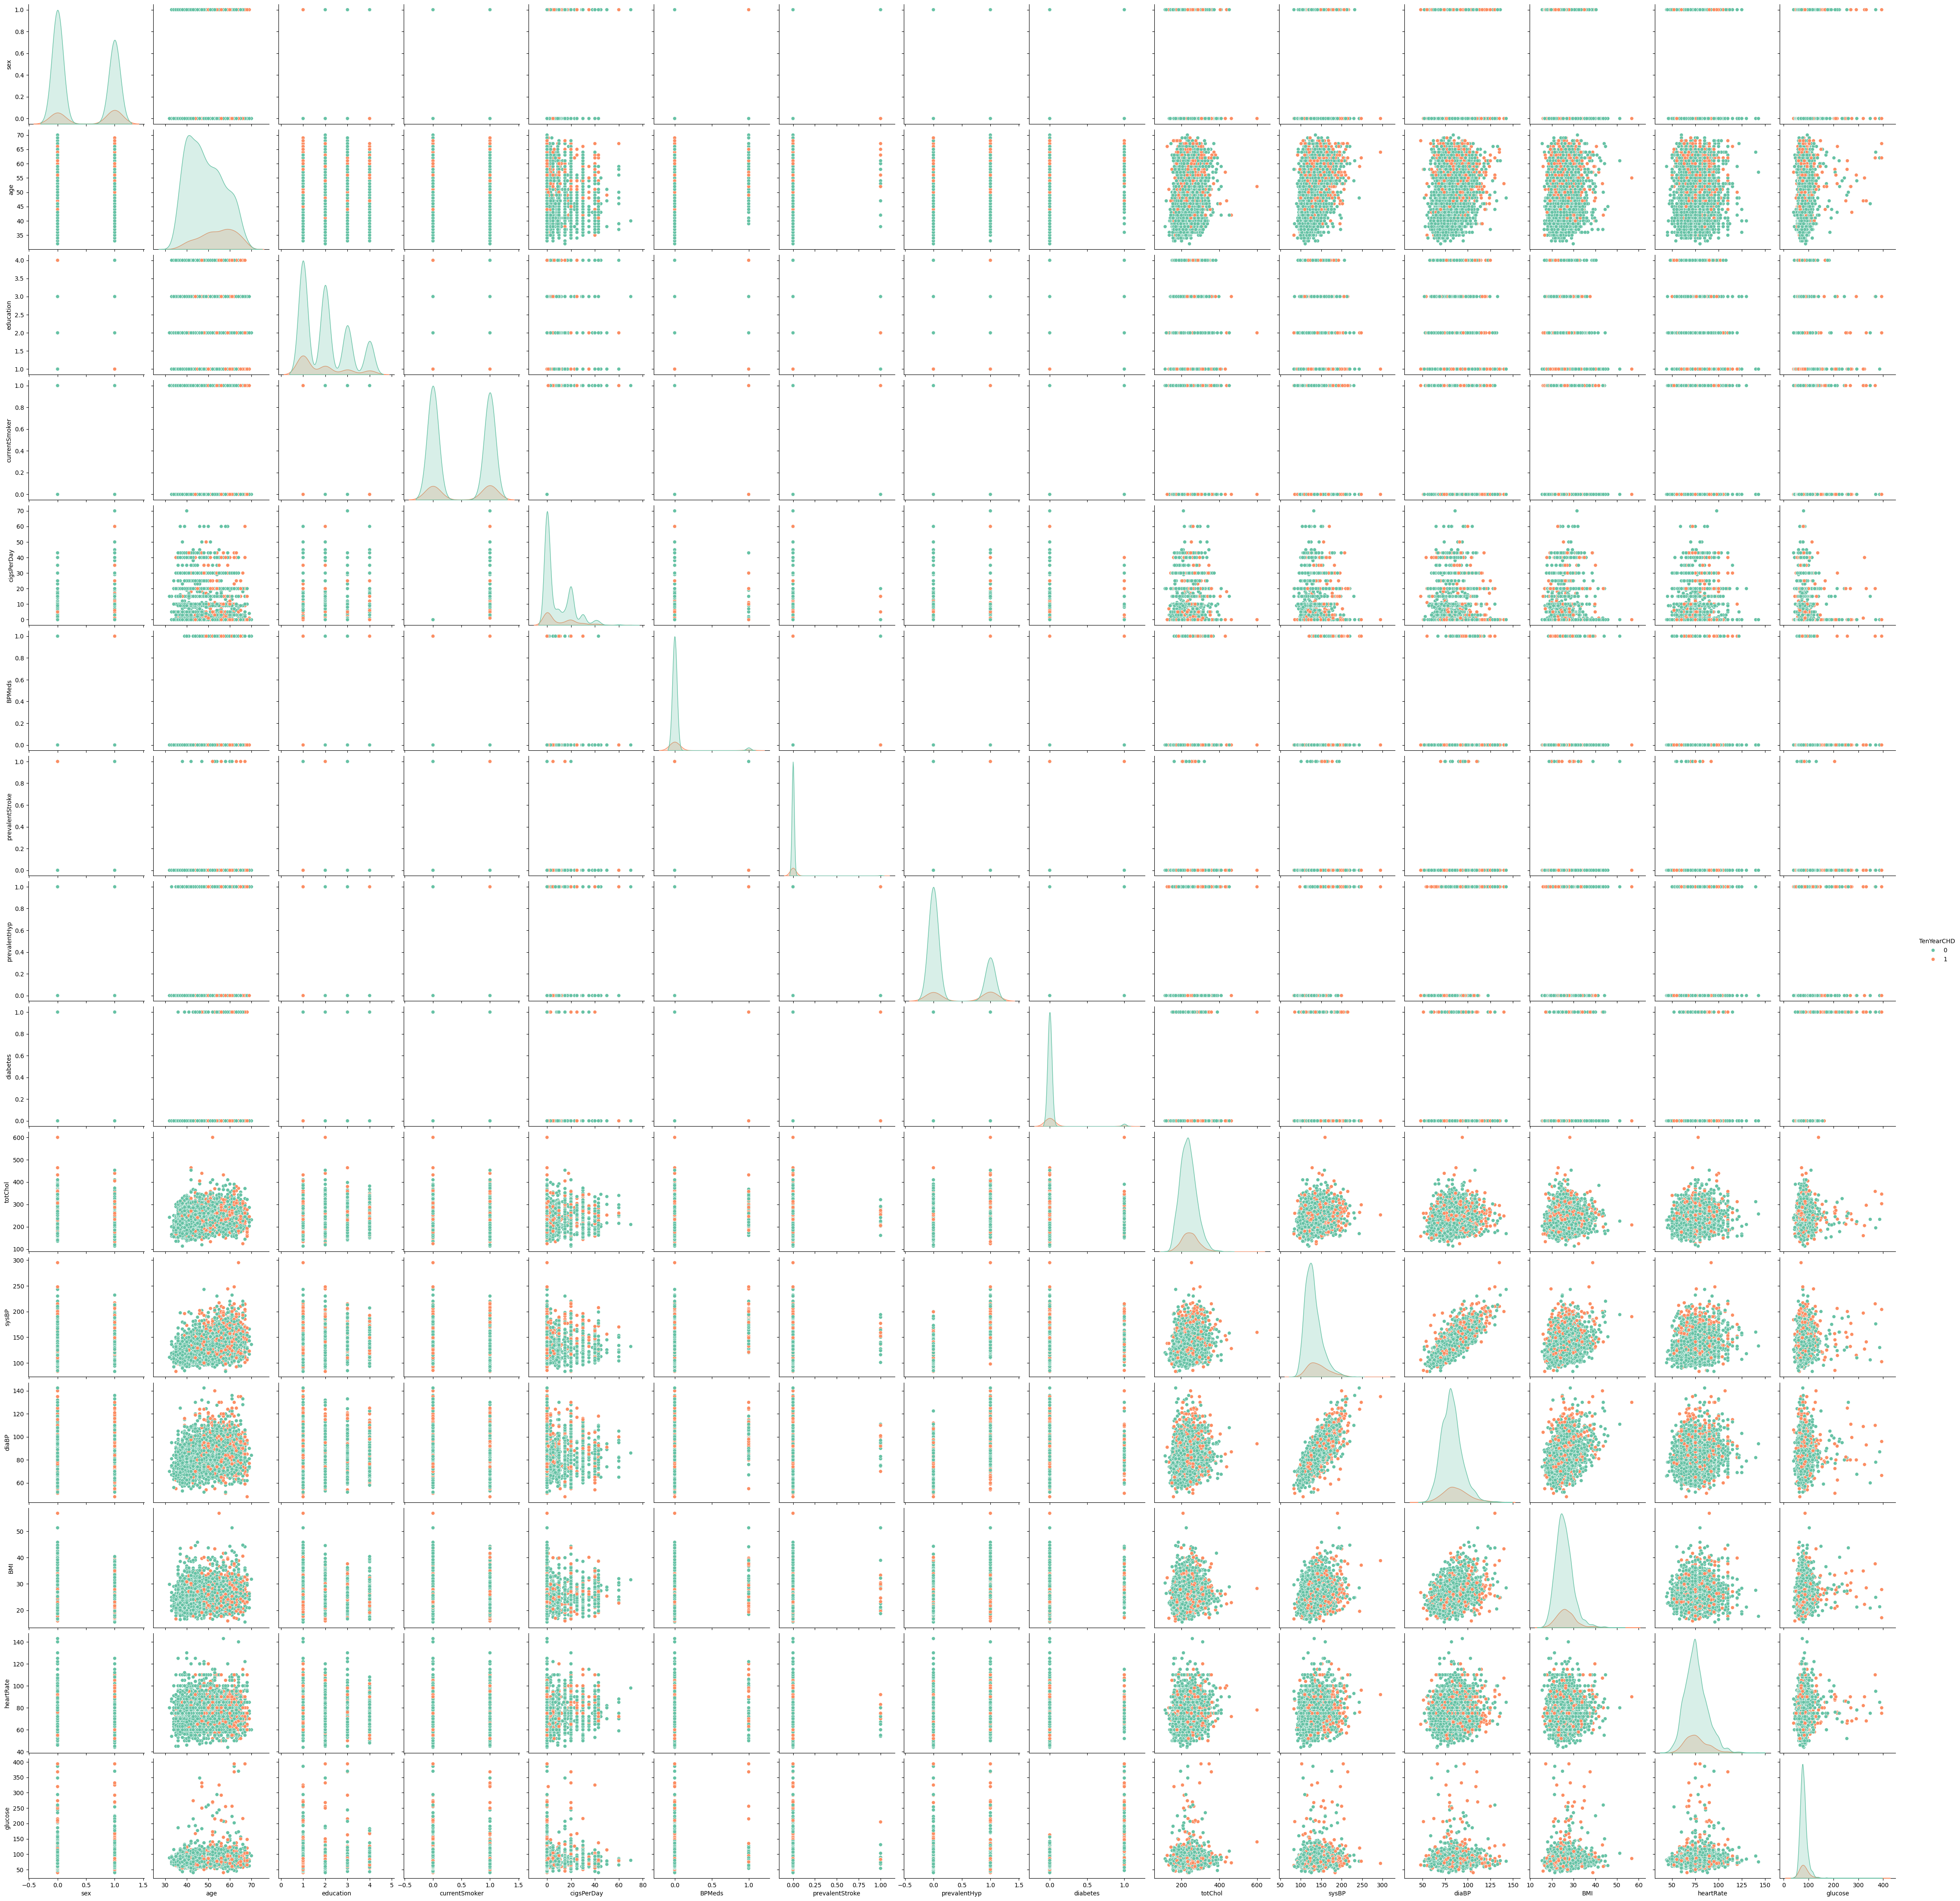

In [38]:
sns.pairplot(df, hue='TenYearCHD', height = 3 , palette = 'Set2')

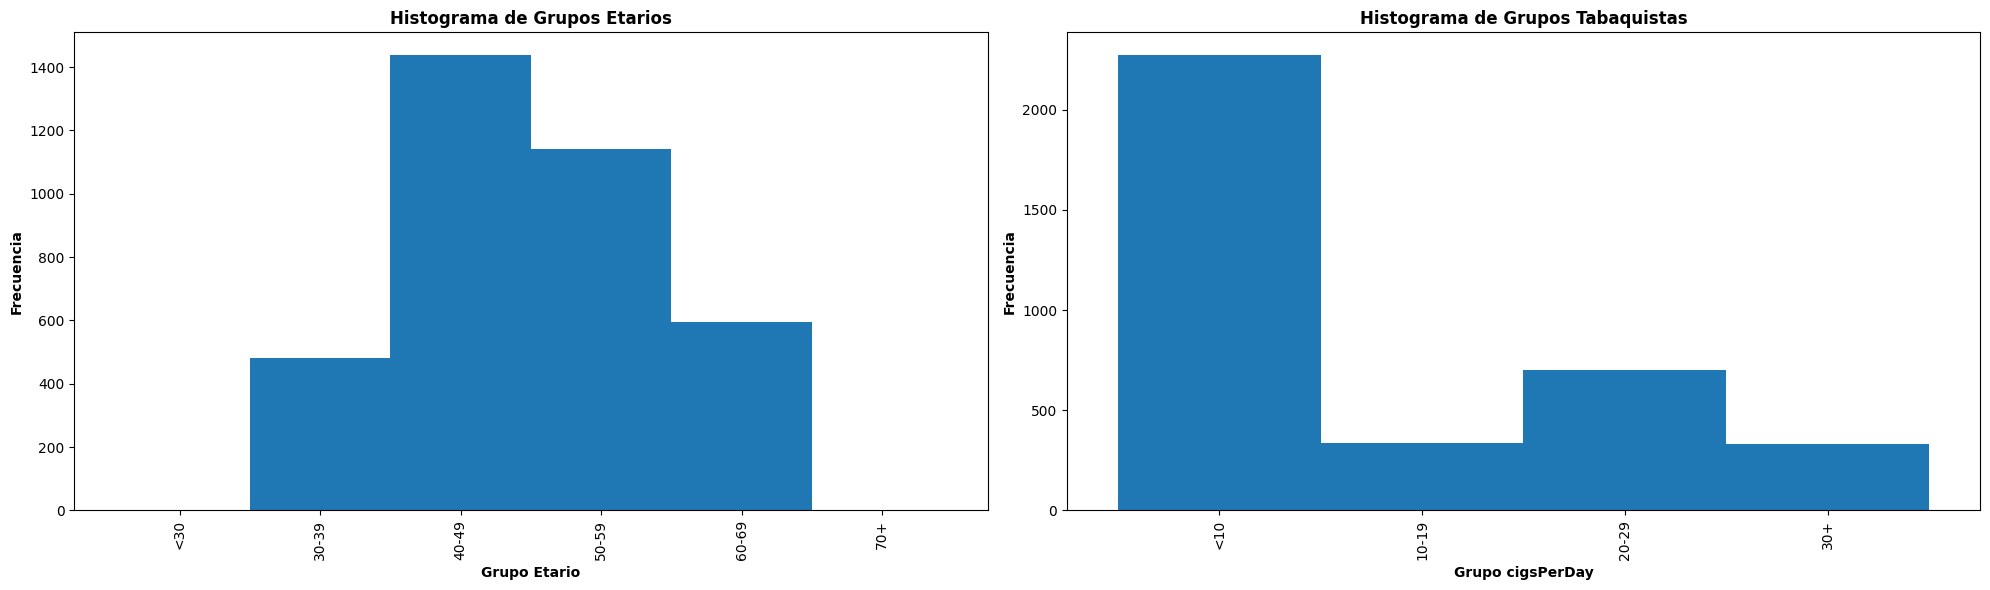

In [15]:
# Definir los rangos etarios y las etiquetas
age_bins = [0, 30, 40, 50, 60, 70, 80]
age_labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70+']

# Crear una nueva columna para los grupos etarios
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Definir los rangos de cigarrillos diarios y las etiquetas
cigs_bins = [0, 10, 20, 30, 50]
cigs_labels = ['<10', '10-19', '20-29', '30+']

# Crear una nueva columna para los grupos de cigarrillos diarios
df['cigs_group'] = pd.cut(df['cigsPerDay'], bins=cigs_bins, labels=cigs_labels, right=False)

# Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Graficar el histograma para los grupos etarios
df['age_group'].value_counts(sort=False).plot(kind='bar', width=1, ax=axes[0])
axes[0].set_xlabel('Grupo Etario', fontweight='bold')
axes[0].set_ylabel('Frecuencia', fontweight='bold')
axes[0].set_title('Histograma de Grupos Etarios', fontweight='bold')

# Graficar el histograma para los grupos de cigarrillos diarios
df['cigs_group'].value_counts(sort=False).plot(kind='bar', width=1, ax=axes[1])
axes[1].set_xlabel('Grupo cigsPerDay', fontweight='bold')
axes[1].set_ylabel('Frecuencia', fontweight='bold')
axes[1].set_title('Histograma de Grupos Tabaquistas', fontweight='bold')

plt.tight_layout()
plt.show()

### **Hipertensión arterial**

La hipertensión arterial (HTA) es una condición en la que la presión de la sangre en las arterias es persistentemente alta. Esta presión elevada, al incrementar la postcarga y las resistencias vasculares, lleva al miocardio a tener que realizar mayor esfuerzo para vencerlas y poder eyectar la sangre, lo que puede llevar a una serie de complicaciones de salud.

#### **La HTA como Factor de Riesgo**
La hipertensión arterial es uno de los principales factores de riesgo para el desarrollo de enfermedades cardiovasculares. Puede causar daño a las arterias, lo que lleva a la aterosclerosis (endurecimiento y estrechamiento de las arterias), aumentando el riesgo de infarto de miocardio, insuficiencia cardíaca, accidente cerebrovascular y enfermedad renal. Además, la hipertensión puede provocar hipertrofia ventricular izquierda, una condición en la que el músculo del corazón se engrosa y se vuelve menos eficiente.

#### **Valores de Tensión Arterial**
Los valores de tensión arterial se clasifican de la siguiente manera:

**Tensión arterial normal:**

Sistólica (máxima): Menos de 120 mm Hg
Diastólica (mínima): Menos de 80 mm Hg

**Hipertensión:**

**Grado 1:**
Sistólica: 130-139 mm Hg
Diastólica: 80-89 mm Hg
**Grado 2:**
Sistólica: 140-179 mm Hg
Diastólica: 90-119 mm Hg

**Crisis hipertensiva:**

**Urgencia hipertensiva:**
Sistólica: 180 mm Hg o más
Diastólica: 120 mm Hg o más, sin daño agudo a órganos
**Emergencia hipertensiva:**
Sistólica: 180 mm Hg o más
Diastólica: 120 mm Hg o más, con daño agudo a órganos4.

In [16]:
# Definir la función de clasificación para sysBP
def class_sysBP(val):
    if val < 130:
        return 'normal'
    elif 130 <= val <= 179:
        return 'HTA'
    else:
        return 'HTA_Crisis'

# Crear una nueva columna para las clases basadas en los valores de sysBP
df['sysBP_class'] = df['sysBP'].apply(class_sysBP)

# Contar la cantidad de registros por clase
sysBP_df = df[['sysBP', 'sysBP_class']].groupby('sysBP_class').count()

# Ordenar los valores por 'normal', 'HTA' y 'HTA_Crisis'
order = ['normal', 'HTA', 'HTA_Crisis']
sysBP_df = sysBP_df.reindex(order)

# Mostrar el DataFrame ordenado
sysBP_df

sysBP
sysBP_class       
normal        1919
HTA           1592
HTA_Crisis     147

In [17]:
# Definir la función de clasificación para diaBP
def class_diaBP(val):
    if val < 80:
        return 'normal'
    elif 80 <= val <= 109:
        return 'HTA'
    else:
        return 'HTA_Crisis'

# Crear una nueva columna para las clases basadas en los valores de sysBP
df['diaBP_class'] = df['diaBP'].apply(class_diaBP)

# Contar la cantidad de registros por clase
diaBP_df = df[['diaBP', 'diaBP_class']].groupby('diaBP_class').count()

# Ordenar los valores por 'normal', 'HTA' y 'HTA_Crisis'
order = ['normal', 'HTA', 'HTA_Crisis']
diaBP_df = diaBP_df.reindex(order)

# Mostrar el DataFrame ordenado
diaBP_df

diaBP
diaBP_class       
normal        1437
HTA           2122
HTA_Crisis      99

In [18]:
BP_df = pd.concat([sysBP_df, diaBP_df], axis=1)
BP_df


sysBP  diaBP
normal       1919   1437
HTA          1592   2122
HTA_Crisis    147     99

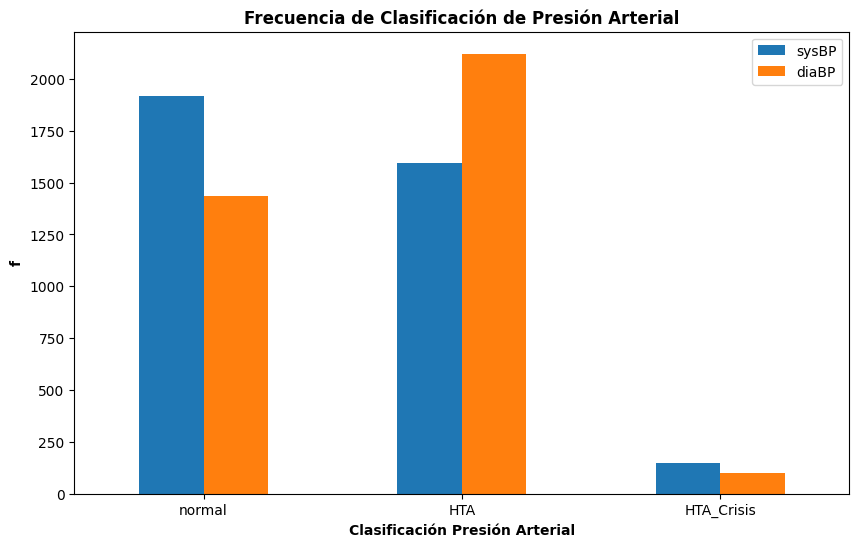

In [19]:
# Crear gráfico de barras combinadas
BP_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Clasificación Presión Arterial', fontweight='bold')
plt.ylabel('f', fontweight='bold')
plt.title('Frecuencia de Clasificación de Presión Arterial', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

In [20]:
sex_ECV = df[['sex', 'TenYearCHD']].groupby(by='sex').mean().reset_index()
sex_ECV

sex  TenYearCHD
0    0    0.122850
1    1    0.189156

### Modelado Machine Learning

In [21]:
df.head()

sex  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0    1   39        4.0              0         0.0     0.0                0   
1    0   46        2.0              0         0.0     0.0                0   
2    1   48        1.0              1        20.0     0.0                0   
3    0   61        3.0              1        30.0     0.0                0   
4    0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD age_group cigs_group sysBP_class diaBP_class  
0           0     30-39        <10      normal      normal  
1           0     40-49        <10      normal         HTA  
2           0     40-49      20-29      normal         HTA  
3           1     60-69        30+         HTA         HTA  
4           0     40-49      20-29         HTA         HTA

In [22]:
df = df.drop(['age_group', 'cigs_group', 'sysBP_class', 'diaBP_class'], axis=1)
df.head()

sex  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0    1   39        4.0              0         0.0     0.0                0   
1    0   46        2.0              0         0.0     0.0                0   
2    1   48        1.0              1        20.0     0.0                0   
3    0   61        3.0              1        30.0     0.0                0   
4    0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [23]:
from sklearn.preprocessing import StandardScaler

# Normalización de las variables numéricas
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [24]:
from sklearn.model_selection import train_test_split

# División del dataset
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Regresión logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))

# Árbol de decisión
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print("Decision Tree:\n", classification_report(y_test, y_pred_tree))

# Random Forest
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)
y_pred_forest = forest_clf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_forest))

C:\Users\matis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       922
           1       0.75      0.02      0.03       176

    accuracy                           0.84      1098
   macro avg       0.80      0.51      0.47      1098
weighted avg       0.83      0.84      0.77      1098

Decision Tree:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       922
           1       0.23      0.24      0.24       176

    accuracy                           0.75      1098
   macro avg       0.54      0.55      0.54      1098
weighted avg       0.75      0.75      0.75      1098

Random Forest:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       922
           1       0.50      0.02      0.04       176

    accuracy                           0.84      1098
   macro avg       0.67      0.51      0.48      1098
weighted avg       0

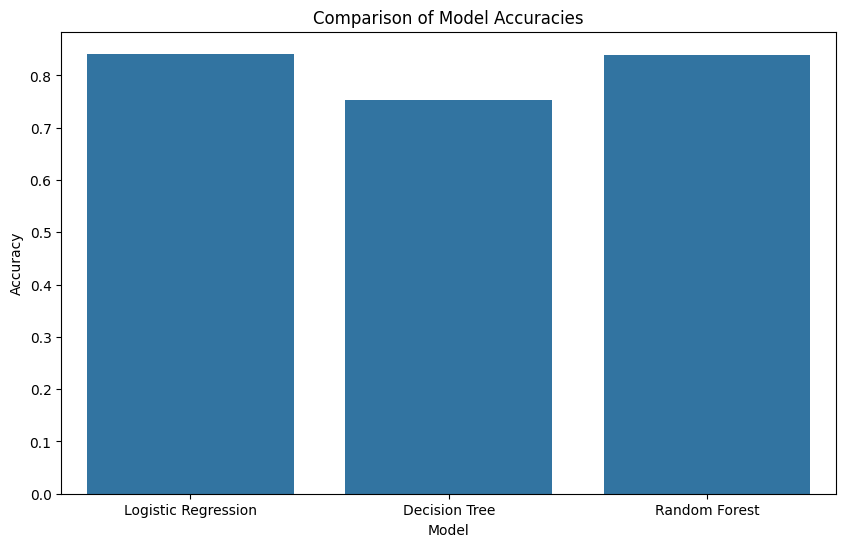

In [26]:
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
decision_tree_accuracy = accuracy_score(y_test, y_pred_tree)
random_forest_accuracy = accuracy_score(y_test, y_pred_forest)

# Crear un DataFrame con las precisiones de los modelos
accuracy_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [log_reg_accuracy, decision_tree_accuracy, random_forest_accuracy]
})

# Graficar el barplot comparando las precisiones de los modelos
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()

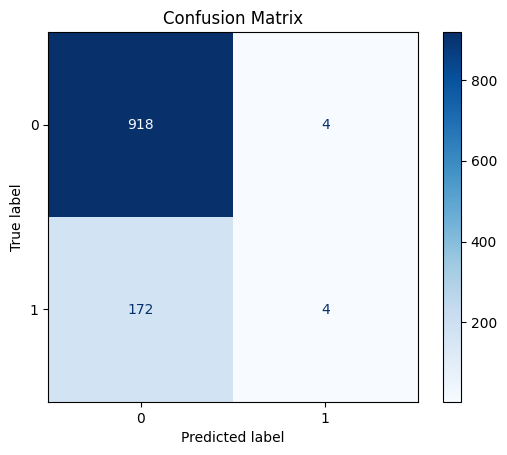

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred_forest)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [28]:
# Importancia de las variables en el modelo Random Forest
importances = forest_clf.feature_importances_
features = X.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

            Feature  Importance
10            sysBP    0.137080
12              BMI    0.129693
1               age    0.123987
9           totChol    0.120484
11            diaBP    0.119271
14          glucose    0.112408
13        heartRate    0.097634
4        cigsPerDay    0.051113
2         education    0.038929
0               sex    0.019730
7      prevalentHyp    0.016357
3     currentSmoker    0.012493
5            BPMeds    0.008210
8          diabetes    0.006883
6   prevalentStroke    0.005728


In [29]:
# Inicializar modelos
svm = SVC()
knn = KNeighborsClassifier()
gbm = GradientBoostingClassifier()
naive_bayes = GaussianNB()

# Entrenar y evaluar SVM
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Entrenar y evaluar KNN
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

# Entrenar y evaluar GBM
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)
gbm_accuracy = accuracy_score(y_test, y_pred_gbm)

# Entrenar y evaluar Naive Bayes
naive_bayes.fit(X_train, y_train)
y_pred_naive_bayes = naive_bayes.predict(X_test)
naive_bayes_accuracy = accuracy_score(y_test, y_pred_naive_bayes)

C:\Users\matis\AppData\Local\Temp\ipykernel_26140\1415728515.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model',


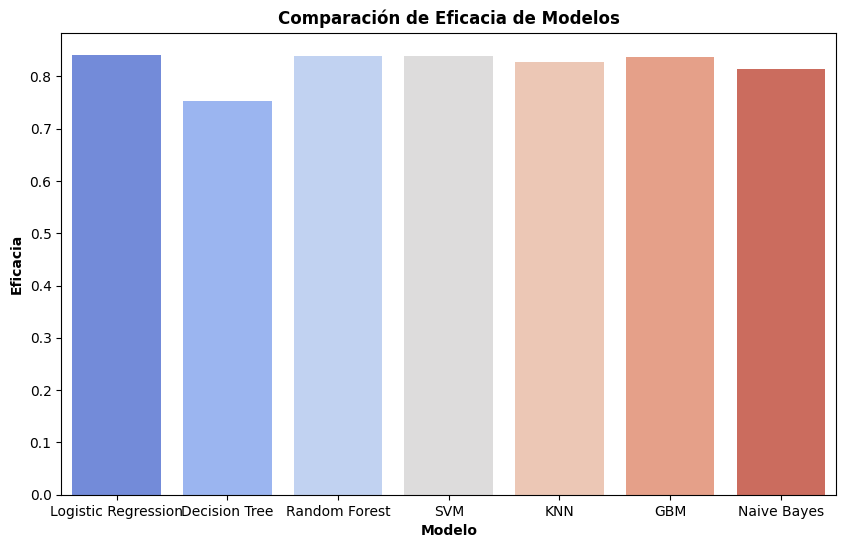

In [30]:
# Crear un DataFrame con las precisiones de los modelos
accuracy_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest','SVM', 'KNN', 'GBM', 'Naive Bayes'],
    'Accuracy': [log_reg_accuracy, decision_tree_accuracy, random_forest_accuracy, svm_accuracy, knn_accuracy, gbm_accuracy, naive_bayes_accuracy]
})

# Graficar el barplot comparando las precisiones de los modelos
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', 
            y='Accuracy',
            palette='coolwarm',
            data=accuracy_df)
plt.xlabel('Modelo', fontweight='bold')
plt.ylabel('Eficacia', fontweight='bold')
plt.title('Comparación de Eficacia de Modelos', fontweight='bold')

plt.show()

In [31]:
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)
accuracy_df

Model  Accuracy
0  Logistic Regression  0.841530
2        Random Forest  0.839709
3                  SVM  0.839709
5                  GBM  0.836976
4                  KNN  0.827869
6          Naive Bayes  0.814208
1        Decision Tree  0.753188

In [36]:
from lazypredict.Supervised import LazyClassifier

def evaluateLazyClassifiers(df, features_for_classification):
        
    features = df.drop(features_for_classification, axis = 1)
    targets = df[features_for_classification]
    features_train, features_test, targets_train, targets_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)
    
    lazyClassifier = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = None)
    models, predictions = lazyClassifier.fit(features_train, features_test, targets_train, targets_test)
    return models

models = evaluateLazyClassifiers(df, ['TenYearCHD'])

models

100%|██████████| 31/31 [00:02<00:00, 14.84it/s]

[LightGBM] [Info] Number of positive: 435, number of negative: 2491
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 974
[LightGBM] [Info] Number of data points in the train set: 2926, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148667 -> initscore=-1.745093
[LightGBM] [Info] Start training from score -1.745093


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.71               0.66     0.66      0.74   
BernoulliNB                        0.81               0.59     0.59      0.79   
LabelPropagation                   0.78               0.56     0.56      0.77   
BaggingClassifier                  0.83               0.56     0.56      0.79   
GaussianNB                         0.81               0.56     0.56      0.78   
LabelSpreading                     0.78               0.56     0.56      0.77   
AdaBoostClassifier                 0.84               0.55     0.55      0.79   
XGBClassifier                      0.82               0.55     0.55      0.78   
PassiveAggressiveClassifier        0.76               0.55     0.55      0.75   
QuadraticDiscriminantAnalysis      0.81               0.55     0.55      0.78   
LinearDiscriminantAnalysis         0.84               0.54     0.54      0.79   
Perceptron                         0.78               0.54     0.54      0.76   
LGBMClassifier                     0.83               0.54     0.54      0.78   
ExtraTreeClassifier                0.77               0.54     0.54      0.75   
CalibratedClassifierCV             0.84               0.54     0.54      0.78   
LogisticRegression                 0.84               0.53     0.53      0.78   
KNeighborsClassifier               0.83               0.52     0.52      0.77   
RandomForestClassifier             0.84               0.52     0.52      0.77   
DecisionTreeClassifier             0.73               0.52     0.52      0.73   
LinearSVC                          0.84               0.52     0.52      0.77   
RidgeClassifier                    0.84               0.51     0.51      0.77   
RidgeClassifierCV                  0.84               0.51     0.51      0.77   
SGDClassifier                      0.83               0.51     0.51      0.77   
ExtraTreesClassifier               0.83               0.50     0.50      0.76   
DummyClassifier                    0.83               0.50     0.50      0.76   
SVC                                0.83               0.50     0.50      0.76   

                               Time Taken  
Model                                      
NearestCentroid                      0.01  
BernoulliNB                          0.01  
LabelPropagation                     0.36  
BaggingClassifier                    0.09  
GaussianNB                           0.01  
LabelSpreading                       0.58  
AdaBoostClassifier                   0.10  
XGBClassifier                        0.07  
PassiveAggressiveClassifier          0.01  
QuadraticDiscriminantAnalysis        0.01  
LinearDiscriminantAnalysis           0.02  
Perceptron                           0.01  
LGBMClassifier                       0.09  
ExtraTreeClassifier                  0.01  
CalibratedClassifierCV               0.03  
LogisticRegression                   0.01  
KNeighborsClassifier                 0.04  
RandomForestClassifier               0.23  
DecisionTreeClassifier               0.02  
LinearSVC                            0.01  
RidgeClassifier                      0.01  
RidgeClassifierCV                    0.05  
SGDClassifier                        0.01  
ExtraTreesClassifier                 0.16  
DummyClassifier                      0.01  
SVC                                  0.14